In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import statsmodels.formula.api as smf
import nltk
from nltk.tokenize import word_tokenize

In [48]:
df = pd.read_csv('movie_review.csv')
df.head()

,fold_id,cv_tag,html_id,sent_id,text,tag
0,0,cv000,29590,0,films adapted from comic books have had plenty...,pos
1,0,cv000,29590,1,"for starters , it was created by alan moore ( ...",pos
2,0,cv000,29590,2,to say moore and campbell thoroughly researche...,pos
3,0,cv000,29590,3,"the book ( or "" graphic novel , "" if you will ...",pos
4,0,cv000,29590,4,"in other words , don't dismiss this film becau...",pos


In [49]:
feature=df['text']
feature.head()

0    films adapted from comic books have had plenty...
1    for starters , it was created by alan moore ( ...
2    to say moore and campbell thoroughly researche...
3    the book ( or " graphic novel , " if you will ...
4    in other words , don't dismiss this film becau...
Name: text, dtype: object

In [50]:
y_1=df['tag']


In [51]:
df['word_count']= df['text'].apply(lambda x: len(str(x).split(" ")))
df[['text','word_count']].head()

,text,word_count
0,films adapted from comic books have had plenty...,52
1,"for starters , it was created by alan moore ( ...",36
2,to say moore and campbell thoroughly researche...,27
3,"the book ( or "" graphic novel , "" if you will ...",30
4,"in other words , don't dismiss this film becau...",13


In [52]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['text','stopwords']].head()

,text,stopwords
0,films adapted from comic books have had plenty...,13
1,"for starters , it was created by alan moore ( ...",14
2,to say moore and campbell thoroughly researche...,9
3,"the book ( or "" graphic novel , "" if you will ...",12
4,"in other words , don't dismiss this film becau...",7


In [53]:
df.head()

,fold_id,cv_tag,html_id,sent_id,text,tag,word_count,stopwords
0,0,cv000,29590,0,films adapted from comic books have had plenty...,pos,52,13
1,0,cv000,29590,1,"for starters , it was created by alan moore ( ...",pos,36,14
2,0,cv000,29590,2,to say moore and campbell thoroughly researche...,pos,27,9
3,0,cv000,29590,3,"the book ( or "" graphic novel , "" if you will ...",pos,30,12
4,0,cv000,29590,4,"in other words , don't dismiss this film becau...",pos,13,7


In [54]:
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['text'].head()

0    films adapted from comic books have had plenty...
1    for starters , it was created by alan moore ( ...
2    to say moore and campbell thoroughly researche...
3    the book ( or " graphic novel , " if you will ...
4    in other words , don't dismiss this film becau...
Name: text, dtype: object

In [55]:
df['text'] = df['text'].str.replace('[^\w\s]','')
df['text'].head()

0    films adapted from comic books have had plenty...
1    for starters  it was created by alan moore  an...
2    to say moore and campbell thoroughly researche...
3    the book  or  graphic novel   if you will  is ...
4    in other words  dont dismiss this film because...
Name: text, dtype: object

In [56]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['text'].head()

0    films adapted comic books plenty success wheth...
1    starters created alan moore eddie campbell bro...
2    say moore campbell thoroughly researched subje...
3    book graphic novel 500 pages long includes nea...
4                       words dont dismiss film source
Name: text, dtype: object

In [57]:
df['stopwords'] = df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['text','stopwords']].head()

,text,stopwords
0,films adapted comic books plenty success wheth...,0
1,starters created alan moore eddie campbell bro...,0
2,say moore campbell thoroughly researched subje...,0
3,book graphic novel 500 pages long includes nea...,0
4,words dont dismiss film source,0


In [58]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

tokens = word_tokenize(''.join(df['text']))
pos=nltk.pos_tag(tokens)

In [59]:
# Previously, we just removed commonly occurring words in a general sense. We can also remove commonly occurring words 
# from our text data First, 
# let’s check the 5 most frequently occurring words in our text data then take call to remove or retain.
freq = pd.Series(' '.join(df['text']).split()).value_counts()[:10]
freq.head()

film     8856
one      5519
movie    5438
like     3553
even     2555
dtype: int64

In [60]:
freq = list(freq)
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['text'].head()



0    films adapted comic books plenty success wheth...
1    starters created alan moore eddie campbell bro...
2    say moore campbell thoroughly researched subje...
3    book graphic novel 500 pages long includes nea...
4                       words dont dismiss film source
Name: text, dtype: object

In [61]:
freq_1 = pd.Series(' '.join(df['text']).split()).value_counts()[-10:]
freq_1

deadset           1
sweetie           1
ferries           1
blowups           1
niftiest          1
organisedcrime    1
gruntlike         1
kelsch            1
thoughtwill       1
relatibility      1
dtype: int64

In [120]:
#removing of those words which are rarely used
freq_1 = list(freq_1)
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['text'].head()


0    films adapted comic books plenty success wheth...
1    starters created alan moore eddie campbell bro...
2    say moore campbell thoroughly researched subje...
3    book graphic novel 500 pages long includes nea...
4                       words dont dismiss film source
Name: text, dtype: object

In [144]:
# from nltk.stem.lancaster import LancasterStemmer
# st =  LancasterStemmer()
# df['text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [145]:
# lemmatizer is giving less accuracy as compared to stteming so here im using steming
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
df['text'][:5].apply(lambda x: " ".join([wordnet_lemmatizer.lemmatize(word) for word in x.split()]))


0    film adapted comic book plenty success whether...
1    starter created alan moore eddie campbell brou...
2    say moore campbell thoroughly researched subje...
3    book graphic novel 500 page long includes near...
4                        word dont dismiss film source
Name: text, dtype: object

In [65]:
# nltk.download('wordcloud')

(-0.5, 399.5, 199.5, -0.5)

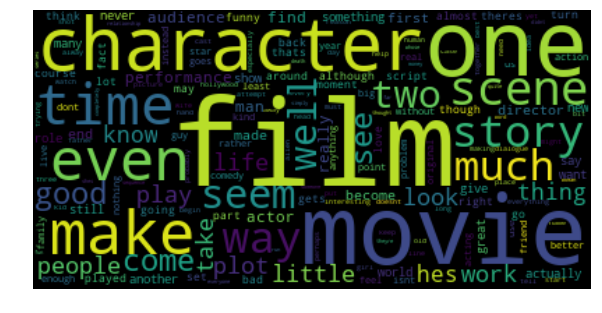

In [36]:

textall = " ".join(feature)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud().generate(textall)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [146]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
sentiment=label_encoder.fit_transform(y_1)


In [151]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = CountVectorizer()
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [152]:

from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
vect.set_params(tokenizer=tokenizer.tokenize)

# remove English stop words
vect.set_params(stop_words='english')

# include 1-grams and 2-grams
vect.set_params(ngram_range=(1, 2))

# ignore terms that appear in more than 50% of the documents
vect.set_params(max_df=0.5)

# only keep terms that appear in at least 2 documents
vect.set_params(min_df=2)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=2,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<bound method TreebankWordTokenizer.tokenize of <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x0000000011695CC0>>,
        vocabulary=None)

In [153]:
vect= vect.fit(df['text'])
vect = vect.transform(df['text'])

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    vect, sentiment, test_size=0.3, random_state=1)

In [155]:
# X_train = pd.Series(X_train[:4000])
# X_test = pd.Series(X_test[:4000])
# y_train=y_train[:4000]
# y_test=y_train[:4000]
# X_train.head()

In [156]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.7075092707045736


In [157]:
from sklearn.linear_model import LogisticRegression

model =  LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [158]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Code starts here
cf = confusion_matrix(y_test,y_pred)
print(cf)
acc = accuracy_score(y_test,y_pred)
print(acc)
precision = precision_score(y_test,y_pred)
print(precision)
recall = recall_score(y_test,y_pred)
print(recall)
f_score = f1_score(y_test,y_pred)
print(f_score)

[[6588 2843]
 [3162 6823]]
0.6907189946435929
0.7058762673287813
0.6833249874812218
0.6944175868912523


In [117]:
print(X_test[:100])

  (0, 2952)	0.4825449442329665
  (0, 8991)	0.22717574989325334
  (0, 20967)	0.6868973773681075
  (0, 25903)	0.49367352412344034
  (1, 7990)	0.6298728510916968
  (1, 12927)	0.7766982628135699
  (2, 2954)	0.3298878070876821
  (2, 4241)	0.7061219329316774
  (2, 10418)	0.4285955765004257
  (2, 21506)	0.2528146199985952
  (2, 25195)	0.2671869290798344
  (2, 27080)	0.27123346994025815
  (3, 1819)	0.2178776308857279
  (3, 8348)	0.45055031903868153
  (3, 9593)	0.3218802679708772
  (3, 9661)	0.3603836725377861
  (3, 10113)	0.24101962957398207
  (3, 13905)	0.2823049507257202
  (3, 23456)	0.41578008779035
  (3, 23636)	0.3547144510743704
  (3, 26193)	0.2820788531328871
  (4, 4406)	0.32227238087991184
  (4, 4707)	0.28099565421382905
  (4, 8991)	0.10271435685368717
  (4, 9483)	0.36884461497623083
  :	:
  (97, 17240)	0.5188602062953436
  (97, 20810)	0.4384234937252355
  (97, 21053)	0.31388100423876003
  (98, 183)	0.26822772471836176
  (98, 4077)	0.24902973423860747
  (98, 6747)	0.24342546651283814
  

In [159]:
y_pred = model.predict(X_test[:100])
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
model_ = DecisionTreeClassifier(random_state=0)
model_.fit(X_train,y_train)
acc = model.score(X_test,y_test)
parameter_grid = {'max_depth': np.arange(3,10), 'min_samples_leaf': range(10,50,10)}
model_2 = DecisionTreeClassifier(random_state=0)
p_tree = GridSearchCV(estimator=model_2, param_grid=parameter_grid,cv=5)
p_tree.fit(X_train,y_train)
acc_2 = p_tree.score(X_test,y_test)
print(acc_2)

0.5309538524927895
